In [655]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os as os

In [656]:
filepath = 'Spice/Circuit.raw'
l = ltspice.Ltspice(filepath)
l.parse() # Data loading sequence. It may take few minutes for huge file.
t = l.get_time()

In [657]:
sim_numero = 5
path = "sim_{}".format(sim_numero)
isExist = os.path.exists(path)
print(isExist)
if not isExist:
   os.makedirs(path)

False


Tensiones entre los puntos A y B deben tener mínimas oscilaciones (máximo 120V, deseado max. 110V)

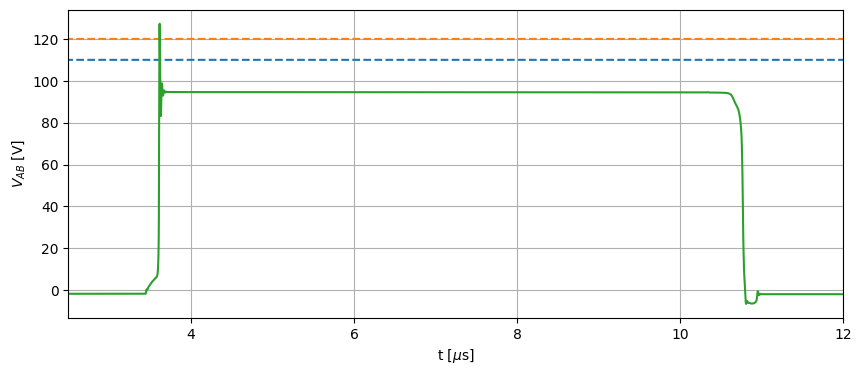

In [658]:
VAB = l.get_data("V(A,B)")
VAB_id = np.full(len(t),110)
VAB_max = np.full(len(t),120)

plt.figure(figsize=(10, 4))
plt.grid()
plt.plot(t/1e-6, VAB_id, "--")
plt.plot(t/1e-6, VAB_max, "--")
plt.plot(t/1e-6, VAB)
plt.xlim([2.5, 12])
plt.xlabel("t [$\mu $s]")
plt.ylabel("$V_{AB}$ [V]")
plt.savefig("sim_{}/Vab_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

Saco datos de las fuentes

In [659]:
fuentes = [["au", -l.get_data("I(Vgau)"), l.get_data("V(N001,A)")], ["ad", -l.get_data("I(vgad)"),l.get_data("V(n004)")], ["bu",-l.get_data("I(Vgbu)"), l.get_data("V(N002,B)")], ["bd",-l.get_data("I(Vgbd)"), l.get_data("V(n005)")]]

La corriente de las fuentes tienen que ser $\pm $3A (como mucho +4A y -6A)

In [660]:
max_c = False
i_lim = 3
for i in fuentes:
    if (abs(np.amax(i[1])) > i_lim):
        max_c = True
        print("La corriente "+ i[0]+ " supera los +/-{}A, tiene {}A".format(i_lim, np.amax(i[1])))
if(max_c == False):
    print("Todas las corrientes están dentro de los límites.")

Todas las corrientes están dentro de los límites.


La potencia media de las fuentes tiene que ser más chica que 2W

In [661]:
max_P = 2
P_lim = False
for i in fuentes:
    Pinst = []
    for time in range(len(t)):
        Pinst.append(i[1][time]*i[2][time])
    i.append(sum(Pinst)/(2*len(t)))
    if (sum(Pinst)/(2*len(t))) > max_P:
        P_lim = True
        print("La fuente " + i[0]+ " disipa más potencia de la máxima permitida, disipa {}W".format(round(sum(Pinst)/(2*len(t)),3)))
if not P_lim:
    print("Todas las fuentes disipa potencia media menor a la máxima")

Todas las fuentes disipa potencia media menor a la máxima


Corriente en los capacitores

In [662]:
def rms(v):
    v_rms = 0
    for k in v:
        v_rms = v_rms + k**2
    return np.sqrt(v_rms/len(v))

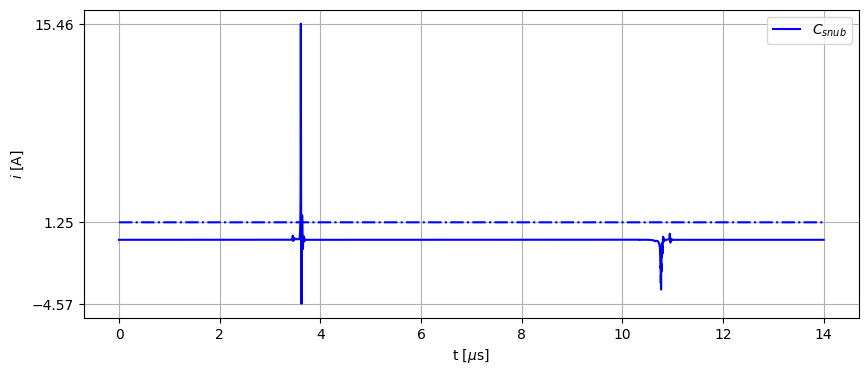

In [663]:
I_csnub = l.get_data("I(Csnub)")

plt.figure(figsize=(10, 4))
plt.grid()
I_csnub_rms = np.full(len(t), rms(I_csnub))
plt.plot(t/1e-6, I_csnub, label = "$C_{snub}$", color = "blue")
plt.plot(t/1e-6, I_csnub_rms, "-.", color = "blue")
plt.xlabel("t [$\mu $s]")
plt.ylabel("$i$ [A]")
plt.yticks([np.amax(I_csnub),np.amin(I_csnub), rms(I_csnub)])
plt.legend()
plt.savefig("sim_{}/icsnub_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

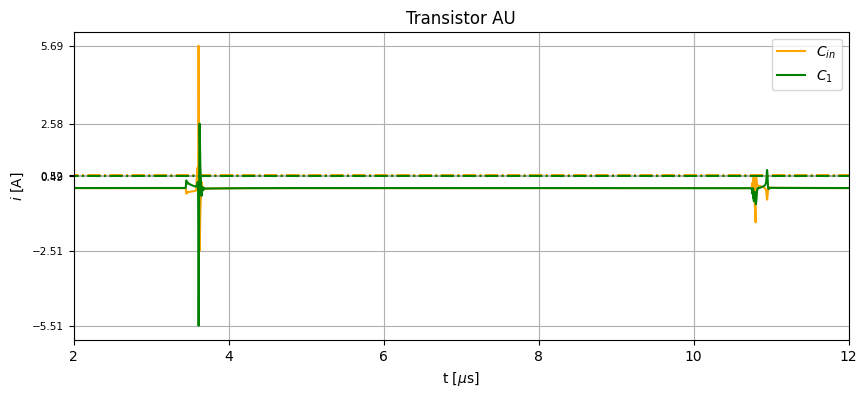

In [664]:
I_C1_gau = l.get_data("I(x1:C1)")
I_Cin_gau = l.get_data("I(x1:Cin)")

plt.figure(figsize=(10, 4))
plt.title("Transistor AU")
#Transistor au
plt.grid()
I_C1_gau_rms = np.full(len(t), rms(I_C1_gau))
I_Cin_gau_rms = np.full(len(t), rms(I_Cin_gau))
plt.plot(t/1e-6, I_Cin_gau, label = "$C_{in}$", color = "orange")
plt.plot(t/1e-6, I_Cin_gau_rms, "-.", color = "orange")
plt.plot(t/1e-6, I_C1_gau, label = "$C_{1}$", color = "green")
plt.plot(t/1e-6, I_C1_gau_rms, "-.", color = "green")
plt.xlim(2,12)
plt.xlabel("t [$\mu $s]")
plt.ylabel("$i$ [A]")
plt.yticks([np.amax(I_C1_gau), np.amin(I_C1_gau), rms(I_C1_gau), np.amax(I_Cin_gau), np.amin(I_Cin_gau), rms(I_Cin_gau)], fontsize=7.5)
plt.legend()
plt.savefig("sim_{}/icau_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

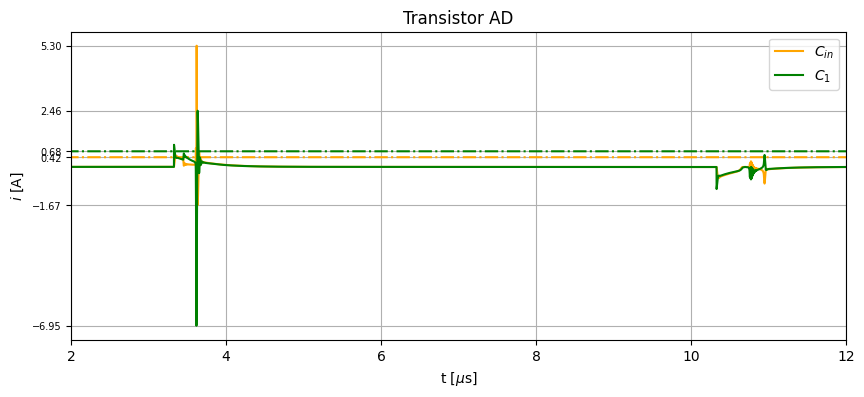

In [665]:
I_C1_gad = l.get_data("I(x2:C1)")
I_Cin_gad = l.get_data("I(x2:Cin)")

plt.figure(figsize=(10, 4))
plt.title("Transistor AD")
#Transistor au
plt.grid()
I_C1_gad_rms = np.full(len(t), rms(I_C1_gad))
I_Cin_gad_rms = np.full(len(t), rms(I_Cin_gad))
plt.plot(t / 1e-6, I_Cin_gad, label="$C_{in}$", color="orange")
plt.plot(t / 1e-6, I_Cin_gad_rms, "-.", color="orange")
plt.plot(t / 1e-6, I_C1_gad, label="$C_{1}$", color="green")
plt.plot(t / 1e-6, I_C1_gad_rms, "-.", color="green")
plt.xlim(2, 12)
plt.xlabel("t [$\mu $s]")
plt.ylabel("$i$ [A]")
plt.yticks(
    [np.amax(I_C1_gad), np.amin(I_C1_gad), rms(I_C1_gad), np.amax(I_Cin_gad), np.amin(I_Cin_gad), rms(I_Cin_gad)],
    fontsize=7)
plt.legend()
plt.savefig("sim_{}/icad_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

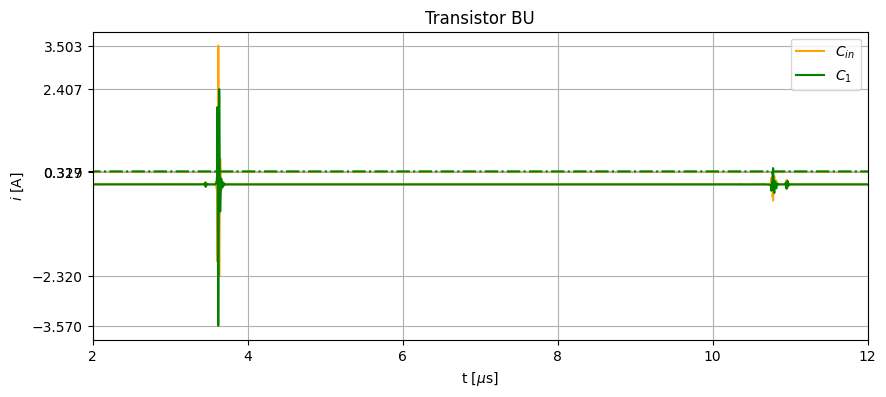

In [666]:
I_C1_gbu = l.get_data("I(x3:C1)")
I_Cin_gbu = l.get_data("I(x3:Cin)")

plt.figure(figsize=(10, 4))
plt.title("Transistor BU")
#Transistor au
plt.grid()
I_C1_gbu_rms = np.full(len(t), rms(I_C1_gbu))
I_Cin_gbu_rms = np.full(len(t), rms(I_Cin_gbu))
plt.plot(t / 1e-6, I_Cin_gbu, label="$C_{in}$", color="orange")
plt.plot(t / 1e-6, I_Cin_gbu_rms, "-.", color="orange")
plt.plot(t / 1e-6, I_C1_gbu, label="$C_{1}$", color="green")
plt.plot(t / 1e-6, I_C1_gbu_rms, "-.", color="green")
plt.xlim(2, 12)
plt.xlabel("t [$\mu $s]")
plt.ylabel("$i$ [A]")
plt.yticks(
    [np.amax(I_C1_gbu), np.amin(I_C1_gbu), rms(I_C1_gbu), np.amax(I_Cin_gbu), np.amin(I_Cin_gbu), rms(I_Cin_gbu)],
    fontsize=10)
plt.legend()
plt.savefig("sim_{}/icbu_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

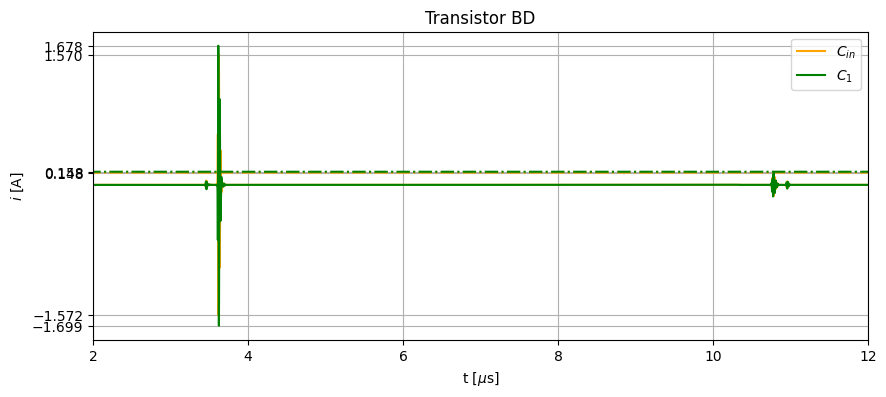

In [667]:
I_C1_gbd = l.get_data("I(x4:C1)")
I_Cin_gbd = l.get_data("I(x4:Cin)")

plt.figure(figsize=(10, 4))
plt.title("Transistor BD")
#Transistor bd
plt.grid()
I_C1_gbd_rms = np.full(len(t), rms(I_C1_gbd))
I_Cin_gbd_rms = np.full(len(t), rms(I_Cin_gbd))
plt.plot(t / 1e-6, I_Cin_gbd, label="$C_{in}$", color="orange")
plt.plot(t / 1e-6, I_Cin_gbd_rms, "-.", color="orange")
plt.plot(t / 1e-6, I_C1_gbd, label="$C_{1}$", color="green")
plt.plot(t / 1e-6, I_C1_gbd_rms, "-.", color="green")
plt.xlim(2, 12)
plt.xlabel("t [$\mu $s]")
plt.ylabel("$i$ [A]")
plt.yticks(
    [np.amax(I_C1_gbd), np.amin(I_C1_gbd), rms(I_C1_gbd), np.amax(I_Cin_gbd), np.amin(I_Cin_gbd), rms(I_Cin_gbd)],
    fontsize=10)
plt.legend()
plt.savefig("sim_{}/icbd_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

$V_{gs}$ desde adentro del transistor.

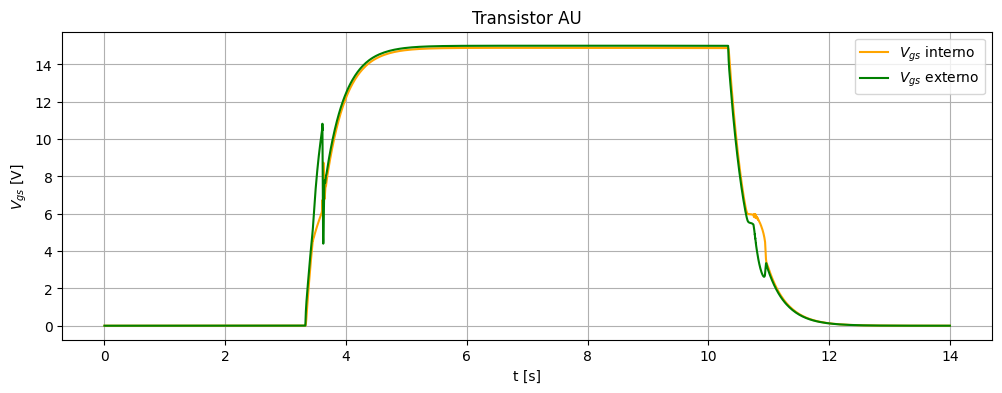

In [668]:
Vgs_gau_int = l.get_data("V(X2:Gi,X2:Si)")
Vgs_gau_ext = l.get_data("V(vgau,A)")
plt.figure(figsize=(12, 4))
plt.title("Transistor AU")
plt.grid()

plt.plot(t / 1e-6, Vgs_gau_int, label="$V_{gs}$ interno", color="orange")
plt.plot(t / 1e-6, Vgs_gau_ext, label="$V_{gs}$ externo", color="green")
plt.legend()
plt.ylabel("$V_{gs}$ [V]")
plt.xlabel("t [s]")
plt.savefig("sim_{}/vgs_AU_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

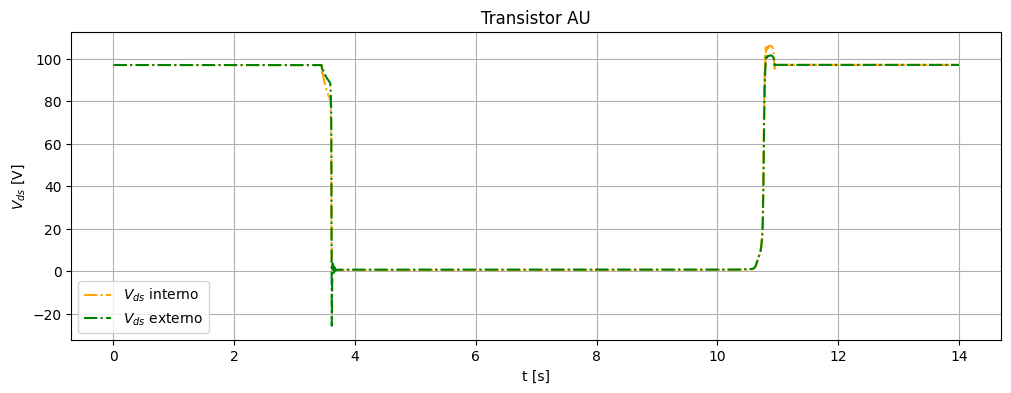

In [669]:
plt.figure(figsize=(12, 4))
plt.title("Transistor AU")
plt.grid()
Vds_gau_int = l.get_data("V(X2:Di,X2:Si)")
Vds_gau_ext = l.get_data("V(vdc,A)")
plt.plot(t / 1e-6, Vds_gau_int, label="$V_{ds}$ interno", color = "orange", linestyle = "-.")
plt.plot(t / 1e-6, Vds_gau_ext, label="$V_{ds}$ externo", color = "green", linestyle = "-.")
plt.ylabel("$V_{ds}$ [V]")
plt.xlabel("t [s]")
plt.legend()
plt.savefig("sim_{}/vds_AU_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

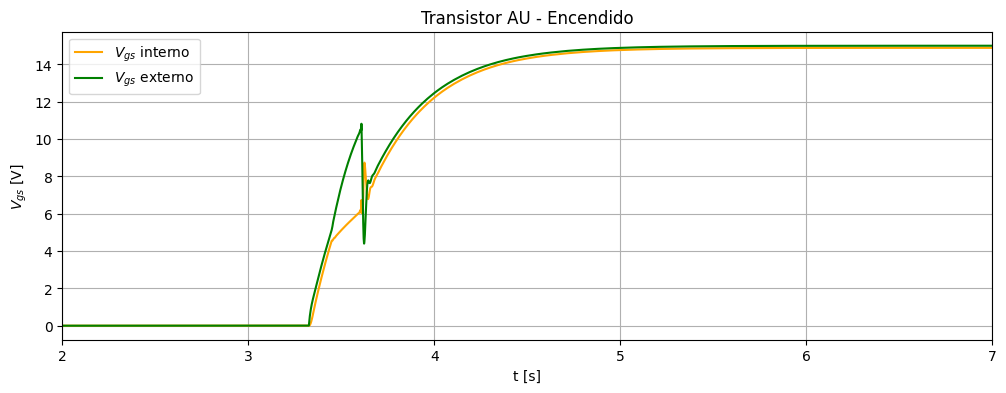

In [670]:
Vgs_gau_int = l.get_data("V(X2:Gi,X2:Si)")
Vgs_gau_ext = l.get_data("V(vgau,A)")
plt.figure(figsize=(12, 4))
plt.title("Transistor AU - Encendido")
plt.grid()

plt.plot(t / 1e-6, Vgs_gau_int, label="$V_{gs}$ interno", color="orange")
plt.plot(t / 1e-6, Vgs_gau_ext, label="$V_{gs}$ externo", color="green")
plt.xlim([2,7])
plt.legend()
plt.ylabel("$V_{gs}$ [V]")
plt.xlabel("t [s]")
plt.savefig("sim_{}/vgs_AU_sim_{}_encendido.png".format(sim_numero, sim_numero))
plt.show()

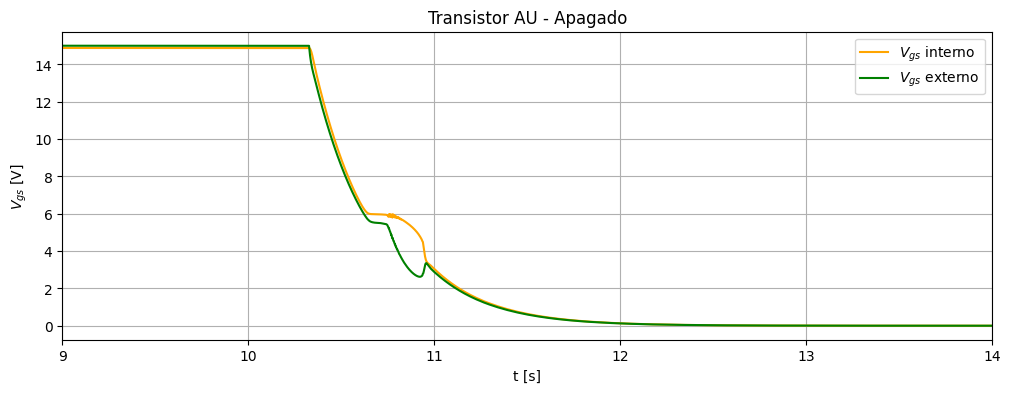

In [671]:
Vgs_gau_int = l.get_data("V(X2:Gi,X2:Si)")
Vgs_gau_ext = l.get_data("V(vgau,A)")
plt.figure(figsize=(12, 4))
plt.title("Transistor AU - Apagado")
plt.grid()

plt.plot(t / 1e-6, Vgs_gau_int, label="$V_{gs}$ interno", color="orange")
plt.plot(t / 1e-6, Vgs_gau_ext, label="$V_{gs}$ externo", color="green")
plt.xlim([9,14])
plt.legend()
plt.ylabel("$V_{gs}$ [V]")
plt.xlabel("t [s]")
plt.savefig("sim_{}/vgs_AU_sim_{}_Apagado.png".format(sim_numero, sim_numero))
plt.show()

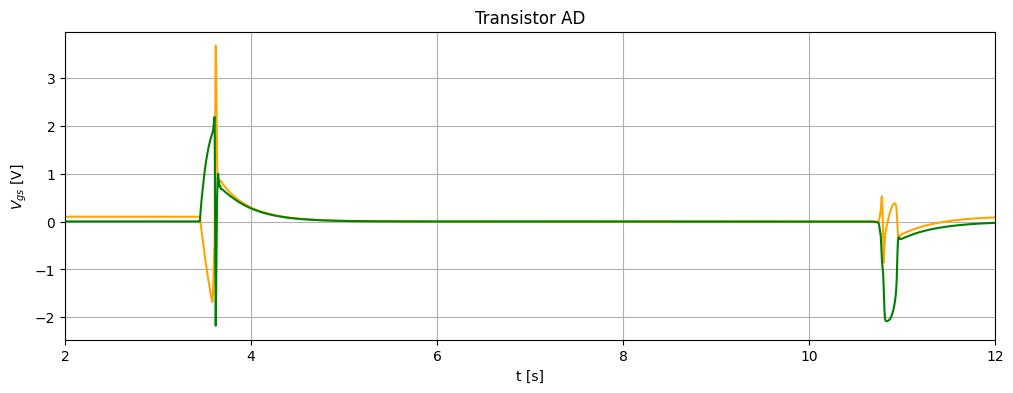

In [672]:
Vgs_gad_int = l.get_data("V(X1:Gi,X1:Si)")
Vgs_gad_ext = l.get_data("V(vgad)")
plt.figure(figsize=(12, 4))
plt.title("Transistor AD")
plt.grid()

plt.plot(t / 1e-6, Vgs_gad_int, label="$V_{gs}$ interno", color="orange")
plt.plot(t / 1e-6, Vgs_gad_ext, label="$V_{gs}$ externo", color="green")
plt.xlim([2,12])
plt.ylabel("$V_{gs}$ [V]")
plt.xlabel("t [s]")
plt.savefig("sim_{}/vgs_AD_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

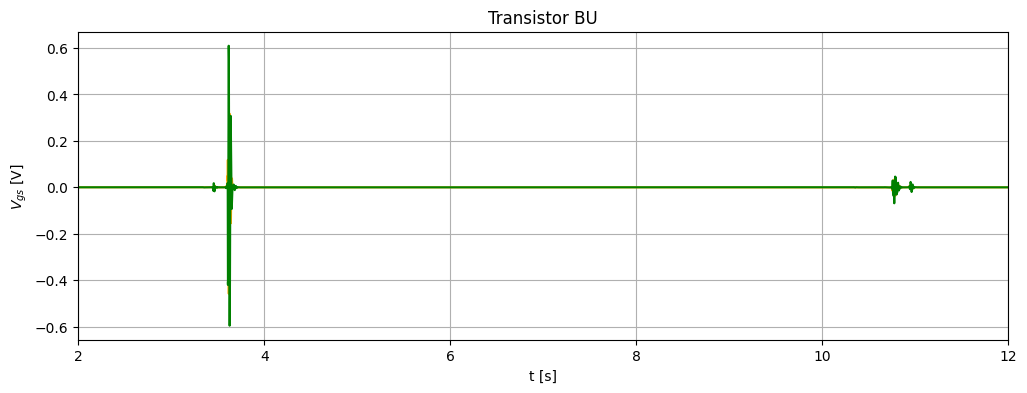

In [673]:
Vgs_bu_int = l.get_data("V(X4:Gi,X4:Si)")
Vgs_bu_ext = l.get_data("V(vgbu,B)")
plt.figure(figsize=(12, 4))
plt.title("Transistor BU")
plt.grid()

plt.plot(t / 1e-6, Vgs_bu_int, label="$V_{gs}$ interno", color="orange")
plt.plot(t / 1e-6, Vgs_bu_ext, label="$V_{gs}$ externo", color="green")
plt.xlim([2,12])
plt.ylabel("$V_{gs}$ [V]")
plt.xlabel("t [s]")
plt.savefig("sim_{}/vgs_BU_sim_{}.png".format(sim_numero, sim_numero))
plt.show()

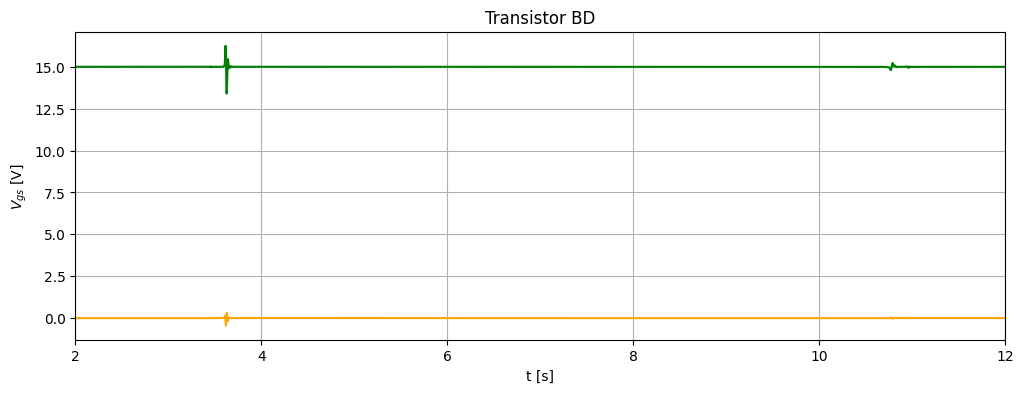

In [674]:
Vgs_bd_int = l.get_data("V(X4:Gi,X4:Si)")
Vgs_bd_ext = l.get_data("V(vgbd)")
plt.figure(figsize=(12, 4))
plt.title("Transistor BD")
plt.grid()

plt.plot(t / 1e-6, Vgs_bd_int, label="$V_{gs}$ interno", color="orange")
plt.plot(t / 1e-6, Vgs_bd_ext, label="$V_{gs}$ externo", color="green")
plt.xlim([2,12])
plt.ylabel("$V_{gs}$ [V]")
plt.xlabel("t [s]")
plt.savefig("sim_{}/vgs_BD_sim_{}.png".format(sim_numero, sim_numero))
plt.show()